To predict which type of cancer it is

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('breast-cancer.csv')

In [4]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


DOMAIN ANALYSIS

id – Unique identifier for each patient record.

diagnosis – Indicates if the tumor is malignant (M) or benign (B).

radius_mean – Average distance from center to tumor boundary (larger may indicate malignancy).

texture_mean – Variation in pixel intensity (irregular texture may suggest malignancy).

perimeter_mean – Circumference of the tumor (higher values often seen in cancer).

area_mean – Total area of the tumor (larger areas may be malignant).

smoothness_mean – Smoothness of tumor edge (lower smoothness = more jagged = cancer risk).

compactness_mean – Compactness of shape (less compact can indicate abnormality).

concavity_mean – Degree of concave regions (higher values indicate malignancy).

concave points_mean – Number of concave points on tumor border (more suggests cancer).

symmetry_mean – Symmetry of the tumor (less symmetry may suggest malignancy).

fractal_dimension_mean – Complexity of the tumor edge (more complex edges can be cancerous).

radius_worst – Largest measured radius (extreme size can indicate malignancy).

texture_worst – Worst texture value (higher variation signals abnormality).

perimeter_worst – Largest perimeter recorded (extremely high values may be malignant).

area_worst – Maximum area observed (very large area suggests malignancy).

smoothness_worst – Highest smoothness value (extreme jaggedness is concerning).

compactness_worst – Worst compactness observed (extreme irregularity signals risk).

concavity_worst – Maximum concavity value (sharp indentations often seen in cancer).

concave points_worst – Most concave points (frequent indentations suggest malignancy).

symmetry_worst – Most asymmetric shape observed (irregular shapes may be malignant).

fractal_dimension_worst – Most complex tumor border (very irregular shapes can be cancerous).

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Exploratory Data Analysis

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


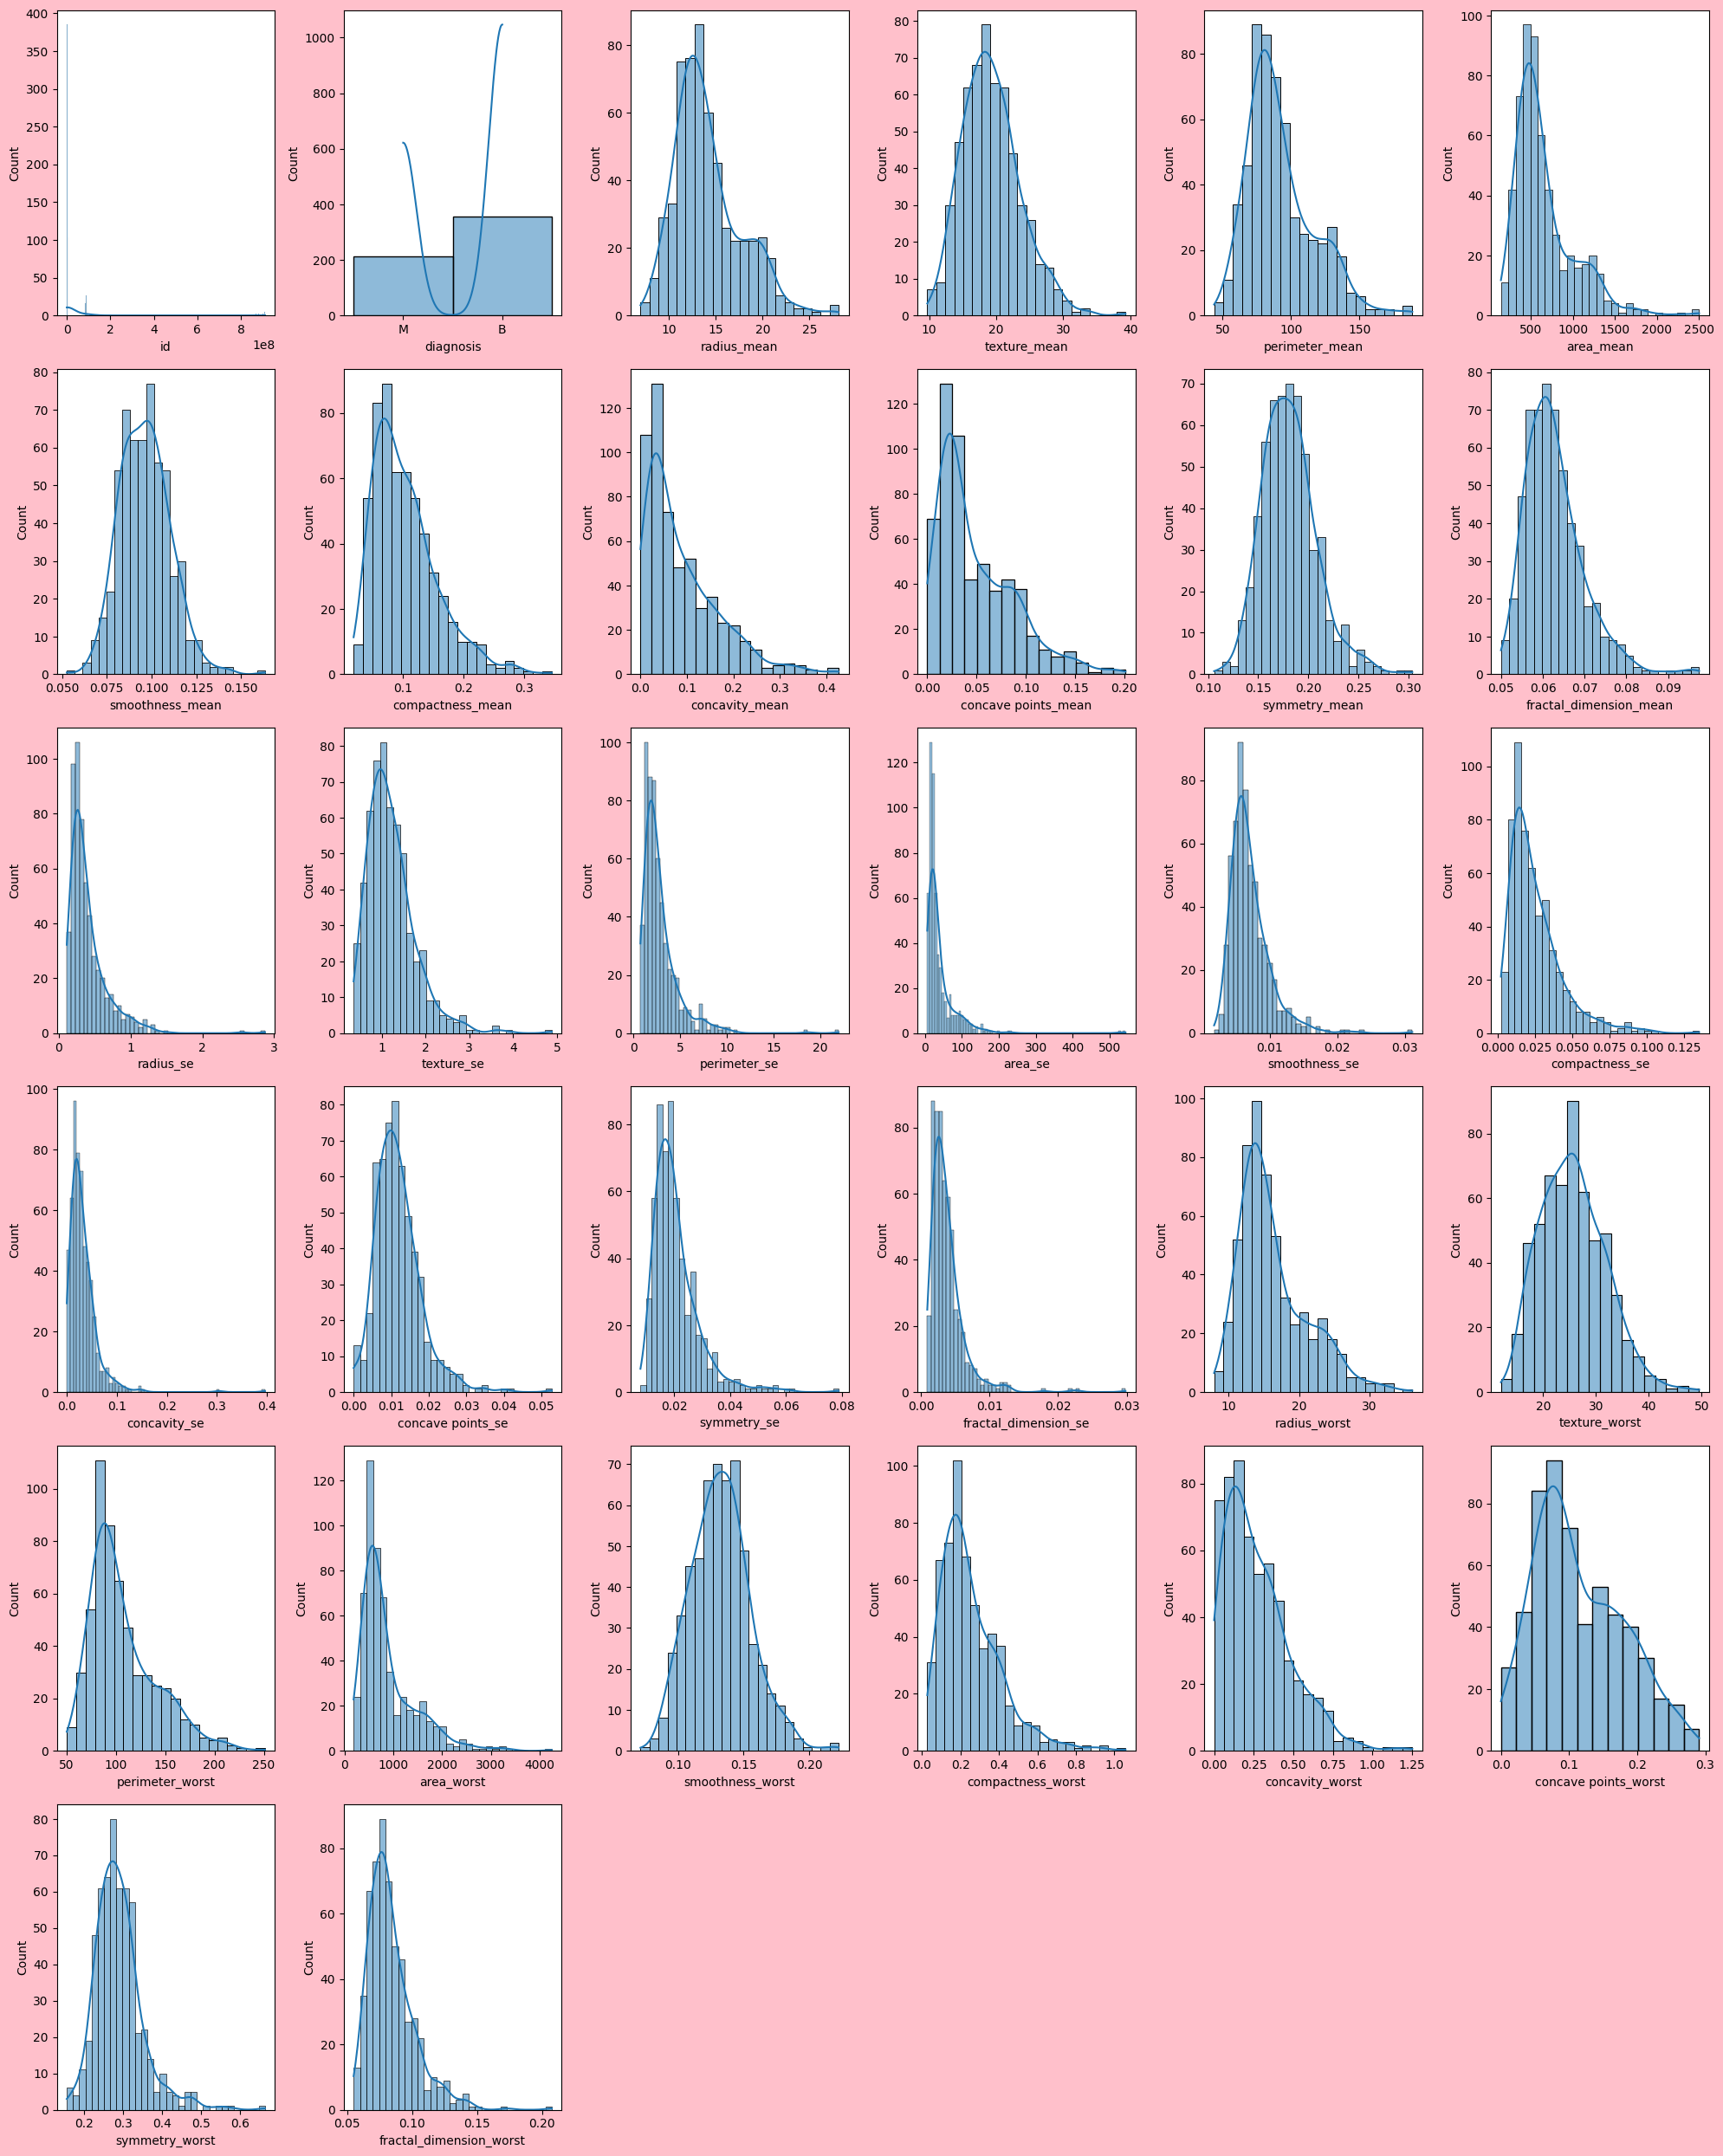

In [8]:
plt.figure(figsize=(20, 25), facecolor='pink')
plotnumber = 1

for column in data:
    if plotnumber<=32:
        ax=plt.subplot(6, 6, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
    plotnumber+=1
plt.tight_layout()

Insights

id column has random large values → it’s not useful for analysis (we can drop it).

diagnosis column shows that more patients have benign (B) tumors than malignant (M).

Features like radius_mean, area_mean, perimeter_mean have higher values for malignant tumors, so they can help in detecting cancer.

Features like texture_mean, smoothness_mean, and symmetry_mean are more normally distributed, meaning their values are balanced and consistent.

Many columns like concavity_mean, concave points_mean, compactness_mean, and their _worst versions are right-skewed, showing that some tumors have very high values, likely malignant.

Features like radius_se, area_se, concavity_se have a lot of small values, with a few large spikes – this tells us they might need scaling before modeling.

fractal_dimension features are tightly grouped and small in value – they may be less useful alone but still help when combined with others.

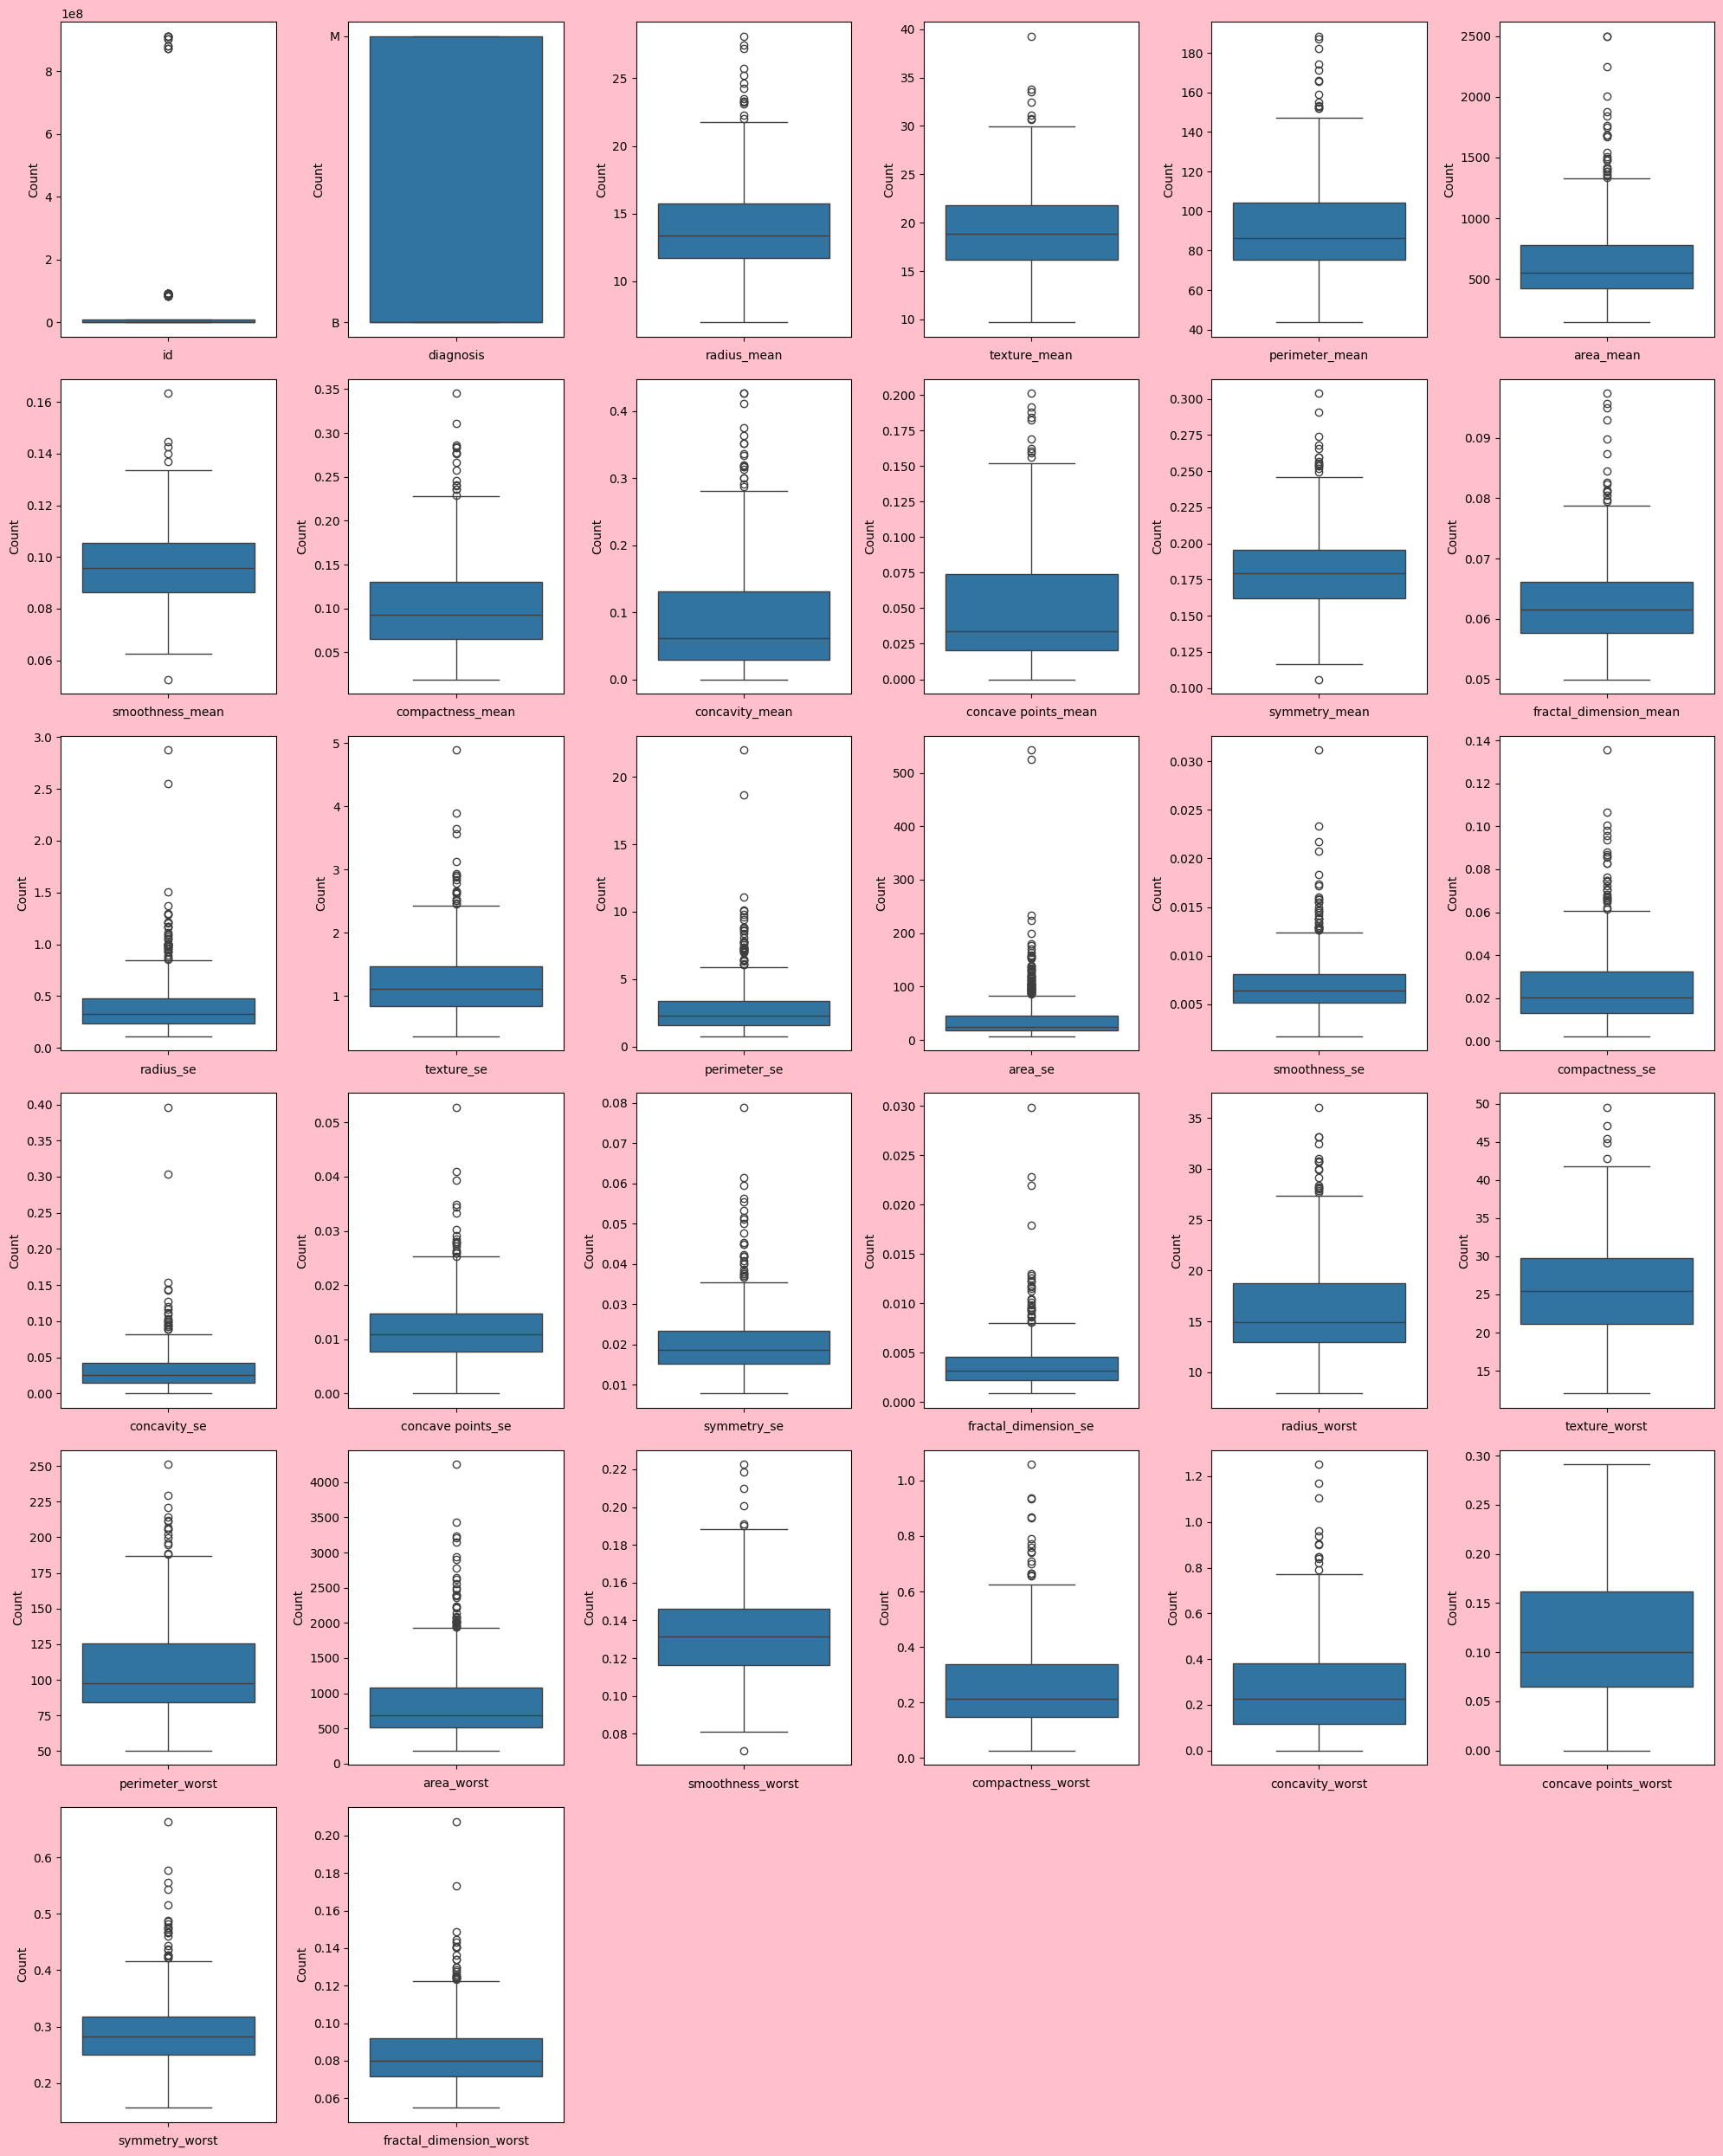

In [9]:
plt.figure(figsize=(20, 25), facecolor='pink')
plotnumber = 1

for column in data:
    if plotnumber<=32:
        ax=plt.subplot(6, 6, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
    plotnumber+=1
plt.tight_layout()

Insights

Outliers Present:

Most features have outliers (data points far from others).

Especially seen in size, shape, and texture-related columns like radius_mean, area_worst, concavity_se, etc.



In [12]:
data_numeric = data.drop(columns=['id', 'diagnosis'])  # if diagnosis is not numeric


In [13]:
correlation_matrix = data_numeric.corr()

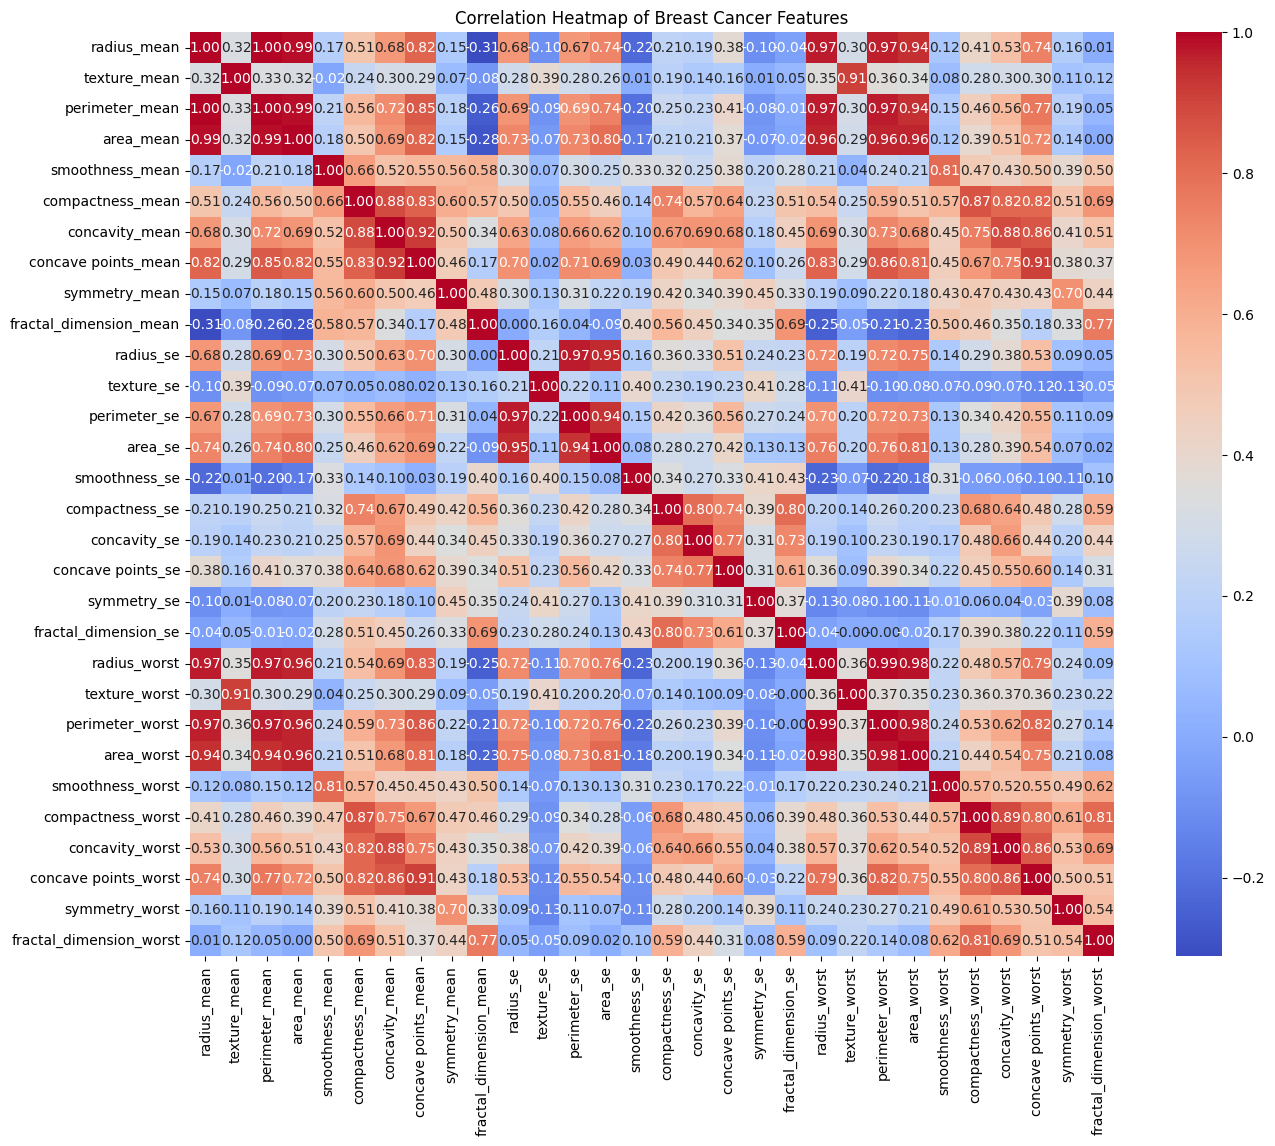

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

In [16]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [17]:
print(data.dtypes)


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [18]:
corr_matrix = data.drop(columns=['diagnosis']).corr().abs()


In [19]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [20]:
# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]


In [21]:
print("Highly correlated features to drop:")
print(to_drop)

Highly correlated features to drop:
['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [22]:
# drop these features
reduced_data = data.drop(columns=to_drop)


In [23]:
reduced_data

,id,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,842517,M,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,84300903,M,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,84348301,M,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,84358402,M,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,...,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,926682,M,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,...,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,926954,M,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,...,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,927241,M,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,...,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


Handling Corrupted data

In [28]:
data.loc[data['concavity_mean']==0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
174,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
175,872113,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592


In [33]:
data.concavity_mean.replace(0,np.median(data.concavity_mean),inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_2596\2305190542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.concavity_mean.replace(0,np.median(data.concavity_mean),inplace=True)


In [34]:
data.loc[data['concavity_mean']==0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [35]:
data.loc[data['concave points_mean']==0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.06154,0.0,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.06154,0.0,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
174,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.06154,0.0,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
175,872113,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.06154,0.0,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.06154,0.0,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.06154,0.0,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.06154,0.0,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.06154,0.0,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.06154,0.0,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.06154,0.0,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592


In [38]:
data['concave points_mean'].replace(0, np.median(data['concave points_mean']), inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_2596\3902339515.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['concave points_mean'].replace(0, np.median(data['concave points_mean']), inplace=True)


In [39]:
data.loc[data['concave points_mean']==0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [46]:
data.loc[data['concavity_worst']==0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.06154,0.0335,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.06154,0.0335,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
174,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.06154,0.0335,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
175,872113,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.06154,0.0335,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.06154,0.0335,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.06154,0.0335,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.06154,0.0335,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.06154,0.0335,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.06154,0.0335,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.06154,0.0335,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592


In [47]:
data['concavity_worst'].replace(0, np.median(data['concavity_worst']), inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_2596\1700791341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['concavity_worst'].replace(0, np.median(data['concavity_worst']), inplace=True)


In [ ]:
data.loc[data['concave points_worst']==0]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.06154,0.0335,...,7.930,19.54,50.41,185.2,0.15840,0.12020,0.2267,0.0,0.2932,0.09382
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.06154,0.0335,...,10.620,14.10,66.53,342.9,0.12340,0.07204,0.2267,0.0,0.3105,0.08151
174,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.06154,0.0335,...,11.540,19.20,73.20,408.3,0.10760,0.06791,0.2267,0.0,0.2710,0.06164
175,872113,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.06154,0.0335,...,9.262,17.04,58.36,259.2,0.11620,0.07057,0.2267,0.0,0.2592,0.07848
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.06154,0.0335,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.2267,0.0,0.1909,0.06559
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.06154,0.0335,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.2267,0.0,0.3142,0.08116
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.06154,0.0335,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.2267,0.0,0.2445,0.08865
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.06154,0.0335,...,13.450,38.05,85.08,558.9,0.09422,0.05213,0.2267,0.0,0.2409,0.06743
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.06154,0.0335,...,9.077,30.92,57.17,248.0,0.12560,0.08340,0.2267,0.0,0.3058,0.09938
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.06154,0.0335,...,11.660,24.77,74.08,412.3,0.10010,0.07348,0.2267,0.0,0.2458,0.06592


In [49]:
data['concave points_worst'].replace(0, np.median(data['concave points_worst']), inplace=True)

C:\Users\adity\AppData\Local\Temp\ipykernel_2596\2791471004.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['concave points_worst'].replace(0, np.median(data['concave points_worst']), inplace=True)


In [ ]:
data.loc[data['concave points_worst']==0]